In [1]:
from keras.datasets import mnist
from keras.datasets import boston_housing
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.regularizers import l1, l2
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [13]:
random.seed(171276)

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [8]:
scaler1 = StandardScaler()
scaler1.fit(train_data)
train_data = scaler1.transform(train_data)
scaler2 = StandardScaler()
scaler2.fit(test_data)
test_data = scaler2.transform(test_data)

In [43]:
def scalar_model1():
    model = Sequential()
    model.add(Dense(64, input_dim=train_data.shape[1], \
                    kernel_initializer='normal', \
                    activation='relu'))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])
    return model

In [10]:
## k-fold validation
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
k = 10
validation = KFold(n_splits=10, shuffle=True, random_state=171276)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
num_val_samples = len(train_data) // k 
num_epochs = 100
all_scores = []
all_histories = []

In [45]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    x_train = np.concatenate( [train_data[:i * num_val_samples],\
                                          train_data[(i + 1) * num_val_samples:]], axis=0)
    y_train = np.concatenate( [train_targets[:i * num_val_samples],\
                                             train_targets[(i + 1) * num_val_samples:]],\
                             axis=0)
    model = scalar_model1()
    fit_i = model.fit(x_train, y_train, epochs=num_epochs, batch_size=1, verbose=0)
    loss_mse, val_mse = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mse)
    all_histories.append(fit_i)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


In [46]:
all_scores

[522.4937561035156,
 343.7922668457031,
 752.7177795410156,
 496.96776123046874,
 506.25576171875,
 482.6242431640625,
 512.853759765625,
 574.8992309570312,
 746.6239868164063,
 487.4032775878906]

In [47]:
np.mean(all_scores)

542.6631823730469

In [48]:
all_histories[0].history

{'loss': [544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544.5546453444513,
  544

In [50]:
all_mse_history = []
for history in all_histories: 
    mse = history.history['mean_squared_error']
    all_mse_history.append(mse)    

In [51]:
average_loss_history = [
    np.mean([x[i] for x in all_loss_history]) for i in range(num_epochs)]

<IPython.core.display.Javascript object>


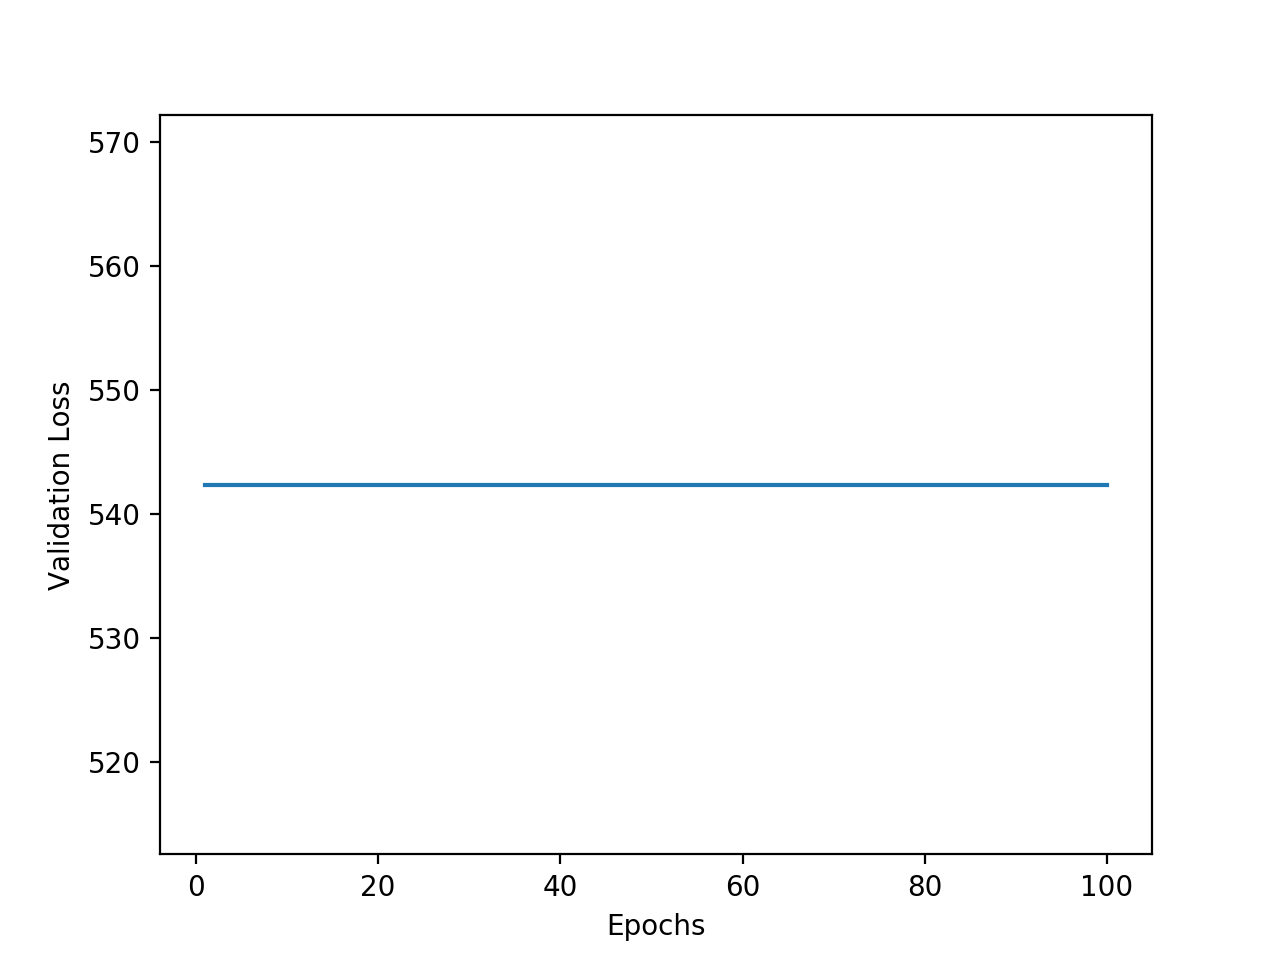

In [52]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(range(1, len(average_loss_history) + 1), average_loss_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.show()

In [56]:
final_model = scalar_model1()
final_fit = final_model.fit(train_data, train_targets,
  epochs=80, batch_size=16, verbose=0)
test_loss_score, test_mse_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 54us/step


In [57]:
test_mse_score

570.7009983436734